In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
# df=pd.read_csv('dataset.csv')
df=pd.read_csv('ratio_dataset.csv')
df = df.drop(columns=['step','nameOrig', 'nameDest','isFlaggedFraud'])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [28]:
df.shape

(3867, 7)

In [29]:
# df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})
# df['isFraud']=df['isFraud'].map({'No Fraud':0,'Fraud':1})

In [30]:
accountCount = df.groupby('isFraud')
print(accountCount.size())

isFraud
0    3843
1      24
dtype: int64


In [31]:
df['type'].value_counts()

type
PAYMENT     2001
CASH_IN      776
CASH_OUT     503
TRANSFER     360
DEBIT        227
Name: count, dtype: int64

In [32]:
df['type']=df['type'].map({'PAYMENT':2, 'TRANSFER':4, 'CASH_OUT':1, 'DEBIT':5, 'CASH_IN':3})

In [33]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,2,11668.14,41554.0,29885.86,0.0,0.0,0


In [34]:
correlations = df.corr(method='pearson')
correlations

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,1.000000,0.217170,0.211748,0.214957,0.104960,0.102776,-0.004478
amount,0.217170,1.000000,0.096071,0.096866,0.389043,0.463110,0.080493
oldbalanceOrg,0.211748,0.096071,1.000000,0.998958,0.234070,0.180700,-0.023941
newbalanceOrig,0.214957,0.096866,0.998958,1.000000,0.238458,0.182302,-0.035107
oldbalanceDest,0.104960,0.389043,0.234070,0.238458,1.000000,0.895940,-0.026663
newbalanceDest,0.102776,0.463110,0.180700,0.182302,0.895940,1.000000,-0.010338
isFraud,-0.004478,0.080493,-0.023941,-0.035107,-0.026663,-0.010338,1.000000


<Axes: >

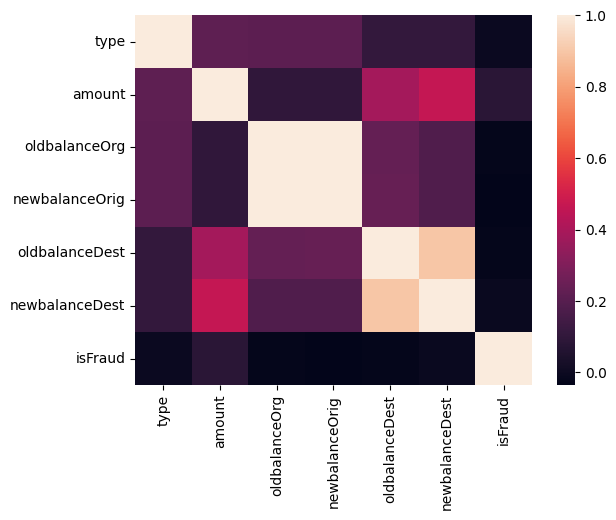

In [35]:
sns.heatmap(correlations)

In [36]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y=df.iloc[:,-1]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
# modelDTC.fit(x_train_selected, y_train)
modelDTC.fit(x_train, y_train)

# x_test_selected = selector.transform(x_test)
# y_pred = modelDTC.predict(x_test_selected)
resultDTC = modelDTC.predict(x_test)
# print(y_pred)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, resultDTC)
print(accuracy*100)

99.48320413436691


In [40]:
# [[0:'type',1:'amount',2:'oldbalanceOrg',3:'newbalanceOrig', 4:'oldbalanceDest', 5:'newbalanceDest']]
# 'PAYMENT':2, 'TRANSFER':4, 'CASH_OUT':1, 'DEBIT':5, 'CASH_IN':3
# result = modelDTC.predict([[1,181,181,0,0,0]])
# result = modelDTC.predict([[181,181,0,0]])
resultDTC = modelDTC.predict(x_test)

# print(result)

Text(0.5, 1.0, 'Accuracy Score: 99.48320413436691')

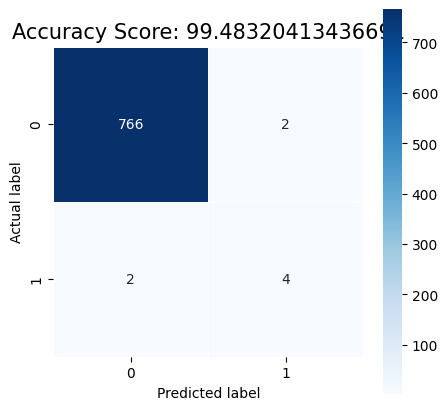

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_test, resultDTC),annot= True,fmt='.0f', linewidths=.5,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(modelDTC.score(x_test, y_test)*100)
plt.title(all_sample_title, size = 15)

In [42]:
classification_report_DTC = classification_report(y_test, resultDTC)
print(classification_report_DTC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       768
           1       0.67      0.67      0.67         6

    accuracy                           0.99       774
   macro avg       0.83      0.83      0.83       774
weighted avg       0.99      0.99      0.99       774



In [43]:
import pickle

with open('pkl_models/DTC_model.pkl', 'wb') as model_file:
    pickle.dump(modelDTC, model_file, protocol=2)

In [45]:
xyz = modelDTC.predict([[4,181,181,0,0,0]])
print(xyz)

[1]


c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
